In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
electric_power_consumption = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';',
                 parse_dates={'Date_Time' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'])
electric_power_consumption.info()

<ipython-input-3-be0b6fa8d119>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  electric_power_consumption = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';',
<ipython-input-3-be0b6fa8d119>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  electric_power_consumption = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';',


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date_Time              datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [ ]:
electric_power_consumption.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
electric_power_consumption.isnull().sum()

Date_Time                    0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
# Fill missing values with column means
electric_power_consumption.fillna(electric_power_consumption.mean(), inplace=True)

# Set the index to the datetime column
electric_power_consumption.set_index('Date_Time', inplace=True)

# Resample the data into hourly intervals and aggregate using mean
newdf = electric_power_consumption.resample('H').mean()

# Check for missing values after resampling
print(newdf.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [ ]:
newdf.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000
mean,1.091647,0.123712,240.839755,4.627892,1.121880,1.298475,6.458390
std,0.891965,0.066402,2.981708,3.734136,3.515967,4.166688,7.304059
min,0.124000,0.000000,225.834500,0.503333,0.000000,0.000000,0.000000
25%,0.343667,0.078333,239.212333,1.520000,0.000000,0.000000,0.650000
50%,0.821767,0.107800,240.935333,3.500000,0.000000,0.333333,1.666667
75%,1.570200,0.148700,242.673667,6.563333,0.000000,0.666667,13.950000
max,6.560533,0.774333,251.902000,28.383333,48.366667,46.433333,21.550000


In [ ]:
data1=newdf.loc[:,['Global_active_power']]

#variable plot is set so that column Global active power will be executed.
plot = newdf['Global_active_power']

<Axes: xlabel='Date_Time'>

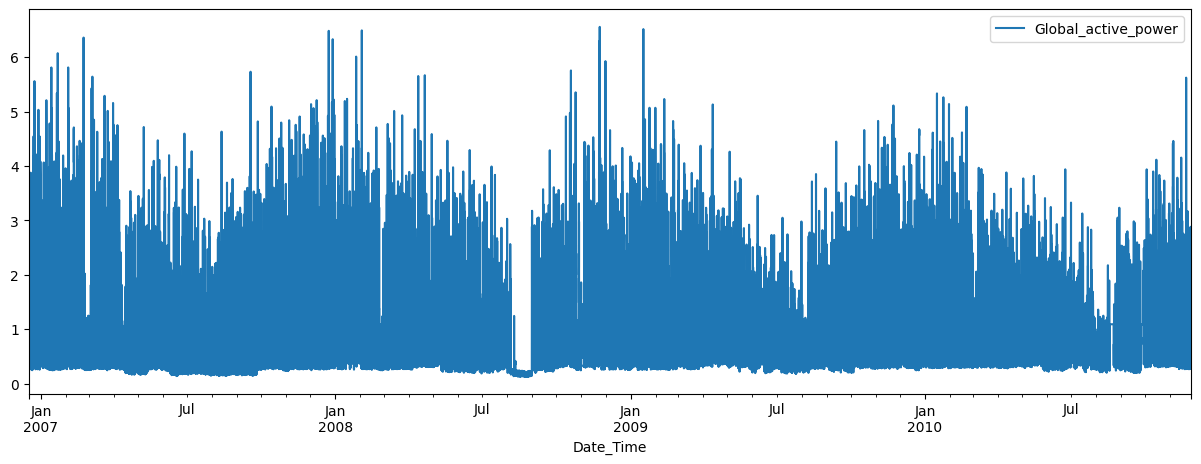

In [ ]:
data1.plot(figsize = (15,5))

In [ ]:
data1.shape

(34589, 1)

Auto Correlation and Partial Auto Correlation Functions

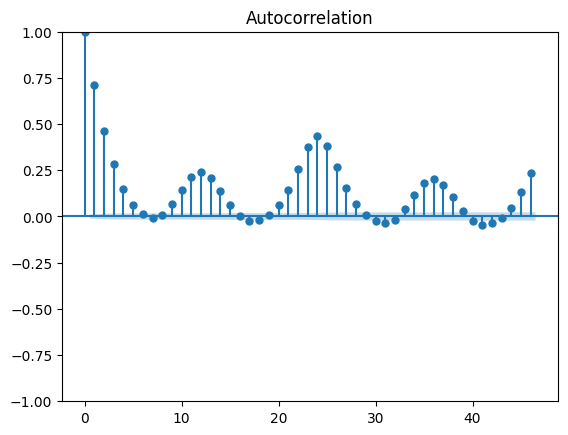

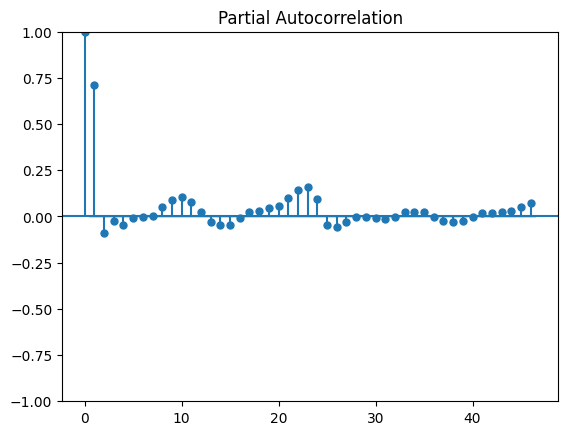

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(plot)

pacf_original = plot_pacf(plot)

Augmented Dicky-Fuller Test: To check if its stationary.



In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF:", dftest[0])
  print("2. P-value:", dftest[1])
  print("3. Num of lags:", dftest[2])
  print("4. Num of observations used for ADF regression and critical values calculation:", dftest[3])
  print("5. Critical values: ")
  for key, val in dftest[4].items():
    print("\t", key, ":", val)


In [ ]:
ad_test(data1['Global_active_power'])

1. ADF: -14.369492090325021
2. P-value: 9.54727021265478e-27
3. Num of lags: 51
4. Num of observations used for ADF regression and critical values calculation: 34537
5. Critical values: 
	 1% : -3.4305393559398922
	 5% : -2.8616236906108443
	 10% : -2.566814545887977


In [ ]:
train_size = int(len(data1) * 0.9)
train, test = data1[:train_size], data1[train_size:]

print(train.shape, test.shape)

(31130, 1) (3459, 1)


In [ ]:
test

,Global_active_power
Date_Time,
2010-07-05 19:00:00,0.981367
2010-07-05 20:00:00,1.302700
2010-07-05 21:00:00,1.871233
2010-07-05 22:00:00,1.708700
2010-07-05 23:00:00,1.545600
...,...
2010-11-26 17:00:00,1.725900
2010-11-26 18:00:00,1.573467
2010-11-26 19:00:00,1.659333


In [ ]:
p_values=range(0,5)
d_values=range(0,2)
q_values=range(0,5)

In [ ]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            predictions = []
            try:
                model = ARIMA(train, order=order)
                model_fit = model.fit()
                y_pred = model_fit.forecast(steps=len(test))[0]
                predictions.extend(y_pred)
                error = mean_squared_error(test, predictions)
                print("ARIMA%s RMSE = %.2f" % (order, error))
                if error < best_rmse:
                    best_rmse = error
                    best_params = order
            except:
                continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/mo

In [ ]:
arima_model_order = model_fit.summary()
arima_model_order

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Global_active_power   No. Observations:                31130
Model:                  ARIMA(4, 1, 4)   Log Likelihood              -29504.393
Date:                 Wed, 10 Apr 2024   AIC                          59026.786
Time:                         12:16:29   BIC                          59101.899
Sample:                     12-16-2006   HQIC                         59050.845
                          - 07-05-2010                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1648      0.054     -3.041      0.002      -0.271      -0.059
ar.L2          0.7006      0.048     14.586      0.000       0.607       0.795
ar.L3          0.4266      0.045      9.523      0.000       0.339       0.514
ar.L4         -0.4987      0.026    -18.887      0.000      -0.550      -0.447
ma.L1         -0.0826      0.054     -1.517      0.129      -0.189       0.024
ma.L2         -1.0004      0.054    -18.505      0.000      -1.106      -0.894
ma.L3         -0.4989      0.057     -8.694      0.000      -0.611      -0.386
ma.L4          0.5936      0.033     17.872      0.000       0.528       0.659
sigma2         0.3897      0.002    201.120      0.000       0.386       0.393
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):             20330.02
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
n_periods = int(len(test))  # Number of periods to predict (10% of test data)
predictions = model_fit.predict(n_periods=n_periods)

In [ ]:
print(predictions)

Date_Time
2006-12-16 17:00:00    0.000000
2006-12-16 18:00:00    4.222889
2006-12-16 19:00:00    3.668707
2006-12-16 20:00:00    3.484662
2006-12-16 21:00:00    3.377975
                         ...   
2010-07-05 14:00:00    0.723990
2010-07-05 15:00:00    1.235803
2010-07-05 16:00:00    1.328092
2010-07-05 17:00:00    1.103668
2010-07-05 18:00:00    0.404915
Freq: H, Name: predicted_mean, Length: 31130, dtype: float64


In [ ]:
predictions

Date_Time
2006-12-16 17:00:00    0.000000
2006-12-16 18:00:00    4.222889
2006-12-16 19:00:00    3.668707
2006-12-16 20:00:00    3.484662
2006-12-16 21:00:00    3.377975
                         ...   
2010-07-05 14:00:00    0.723990
2010-07-05 15:00:00    1.235803
2010-07-05 16:00:00    1.328092
2010-07-05 17:00:00    1.103668
2010-07-05 18:00:00    0.404915
Freq: H, Name: predicted_mean, Length: 31130, dtype: float64

In [ ]:
# Slice the predictions array to only include the last n_periods
sliced_predictions = predictions[-n_periods:]

In [ ]:
sliced_predictions

Date_Time
2010-02-11 16:00:00    0.743982
2010-02-11 17:00:00    0.869080
2010-02-11 18:00:00    1.028979
2010-02-11 19:00:00    1.584723
2010-02-11 20:00:00    2.217457
                         ...   
2010-07-05 14:00:00    0.723990
2010-07-05 15:00:00    1.235803
2010-07-05 16:00:00    1.328092
2010-07-05 17:00:00    1.103668
2010-07-05 18:00:00    0.404915
Freq: H, Name: predicted_mean, Length: 3459, dtype: float64

In [ ]:
sliced_predictions.index

DatetimeIndex(['2010-02-11 16:00:00', '2010-02-11 17:00:00',
               '2010-02-11 18:00:00', '2010-02-11 19:00:00',
               '2010-02-11 20:00:00', '2010-02-11 21:00:00',
               '2010-02-11 22:00:00', '2010-02-11 23:00:00',
               '2010-02-12 00:00:00', '2010-02-12 01:00:00',
               ...
               '2010-07-05 09:00:00', '2010-07-05 10:00:00',
               '2010-07-05 11:00:00', '2010-07-05 12:00:00',
               '2010-07-05 13:00:00', '2010-07-05 14:00:00',
               '2010-07-05 15:00:00', '2010-07-05 16:00:00',
               '2010-07-05 17:00:00', '2010-07-05 18:00:00'],
              dtype='datetime64[ns]', name='Date_Time', length=3459, freq='H')

In [ ]:
sliced_predictions

Date_Time
2010-02-11 16:00:00    0.743982
2010-02-11 17:00:00    0.869080
2010-02-11 18:00:00    1.028979
2010-02-11 19:00:00    1.584723
2010-02-11 20:00:00    2.217457
                         ...   
2010-07-05 14:00:00    0.723990
2010-07-05 15:00:00    1.235803
2010-07-05 16:00:00    1.328092
2010-07-05 17:00:00    1.103668
2010-07-05 18:00:00    0.404915
Freq: H, Name: predicted_mean, Length: 3459, dtype: float64

In [ ]:
test['Global_active_power']

Date_Time
2010-07-05 19:00:00    0.981367
2010-07-05 20:00:00    1.302700
2010-07-05 21:00:00    1.871233
2010-07-05 22:00:00    1.708700
2010-07-05 23:00:00    1.545600
                         ...   
2010-11-26 17:00:00    1.725900
2010-11-26 18:00:00    1.573467
2010-11-26 19:00:00    1.659333
2010-11-26 20:00:00    1.163700
2010-11-26 21:00:00    0.934667
Freq: H, Name: Global_active_power, Length: 3459, dtype: float64

In [ ]:
test.index

DatetimeIndex(['2010-07-05 19:00:00', '2010-07-05 20:00:00',
               '2010-07-05 21:00:00', '2010-07-05 22:00:00',
               '2010-07-05 23:00:00', '2010-07-06 00:00:00',
               '2010-07-06 01:00:00', '2010-07-06 02:00:00',
               '2010-07-06 03:00:00', '2010-07-06 04:00:00',
               ...
               '2010-11-26 12:00:00', '2010-11-26 13:00:00',
               '2010-11-26 14:00:00', '2010-11-26 15:00:00',
               '2010-11-26 16:00:00', '2010-11-26 17:00:00',
               '2010-11-26 18:00:00', '2010-11-26 19:00:00',
               '2010-11-26 20:00:00', '2010-11-26 21:00:00'],
              dtype='datetime64[ns]', name='Date_Time', length=3459, freq='H')

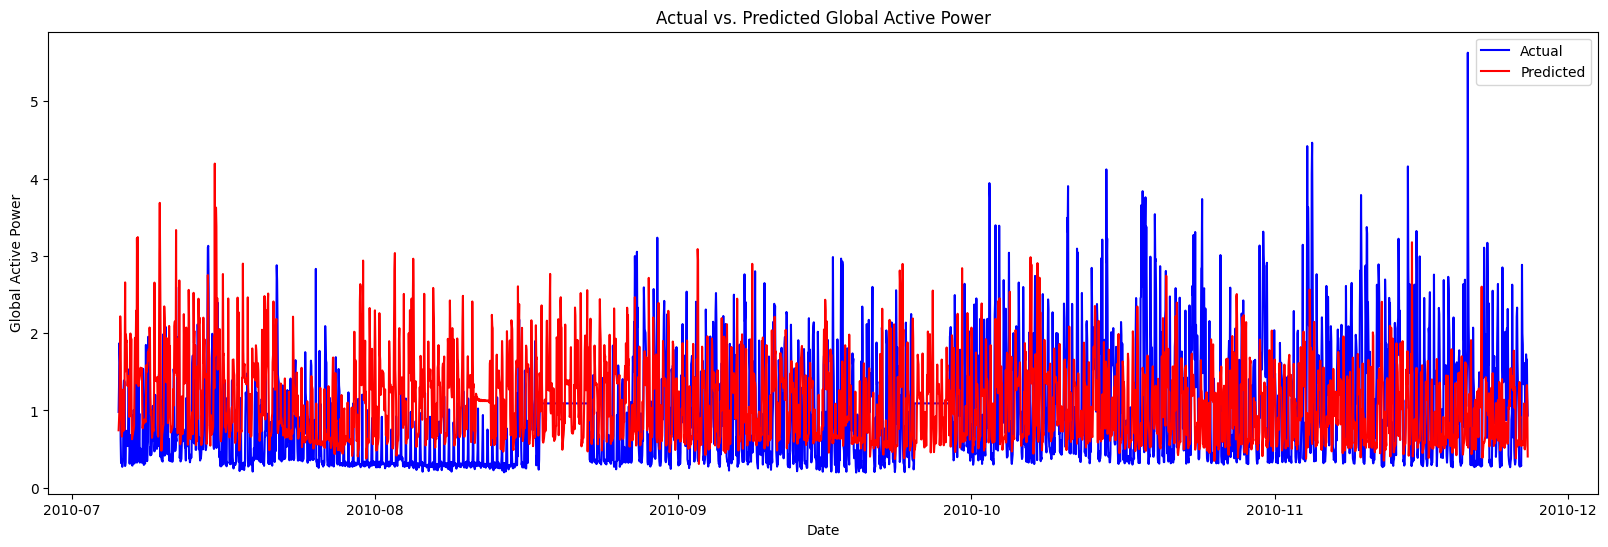

In [ ]:
# Get predictions from the fitted model
#predictions = model.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Plot actual vs. predicted values
plt.figure(figsize=(20, 6))
plt.plot(test.index,test['Global_active_power'] , color='blue' ,label='Actual')
plt.plot(test.index, sliced_predictions, color='red', label='Predicted')
plt.title('Actual vs. Predicted Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming 'test' is your actual test dataset and 'predictions' are the predictions from the ARIMA model

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, sliced_predictions))

# Calculate MAE
mae = mean_absolute_error(test, sliced_predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 0.9210414507708861
MAE: 0.7222595029630271
